In [1]:
import sys
sys.path.append('/root/sharedfolder/salnet_keras/')
import model1_salnet_keras as salnet
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from scipy import ndimage


Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:
model = salnet.get_model()
(X_train, Y_train), (X_val, Y_val) = salnet.load_datasets()

(9000, 3, 240, 320) (9000, 1, 240, 320)
(1000, 3, 240, 320) (1000, 1, 240, 320)


In [3]:
import h5py
def load_datasets_images():
    DATASET_FILE = '/root/sharedfolder/salnet_keras/input/dataset.h5'
    f = h5py.File(DATASET_FILE)
    X_train = f['train/stimuli']
    Y_train = f['train/saliency']
    X_val = f['val/stimuli']
    Y_val = f['val/saliency']
    print X_train.shape, Y_train.shape
    print X_val.shape, Y_val.shape
    return (X_train, Y_train), (X_val, Y_val)

(X_train_n, Y_train_n), (X_val_n, Y_val_n) = load_datasets_images()

KeyError: 'Unable to open object (Component not found)'

In [4]:
#plt.imshow(X_val_n[0].transpose((1,2,0)))


In [19]:
model.load_weights('/root/sharedfolder/salnet_keras/output/model1_salnet_keras_5/final.weights')
model.save("/root/sharedfolder/salnet_keras/output/model1_salnet_keras_5/model_2.h5")

In [17]:
preds = model.predict(X_val[:10])

(1, 240, 320)


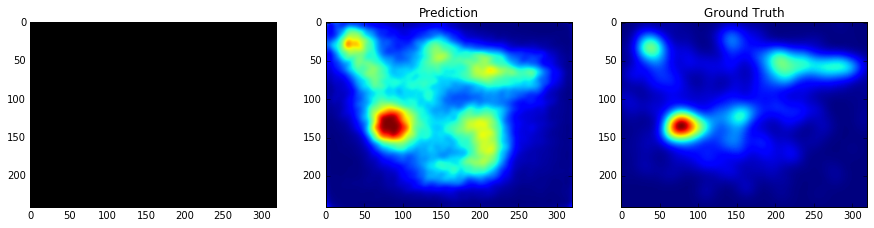

In [18]:
img_id = 4
plt.figure(1, figsize=(15,30))
blured= ndimage.gaussian_filter(preds[img_id], sigma=3)
sal_map = blured
sal_map -= np.min(sal_map)
sal_map /= np.max(sal_map)
print sal_map.shape
plt.subplot(1,3,2)
plt.imshow(sal_map[0])
plt.title('Prediction')

plt.subplot(1,3,3)
plt.imshow(Y_val[img_id,0,:,:])
plt.title('Ground Truth')
#plt.imshow(preds[0])

plt.subplot(1,3,1)
plt.imshow(X_val[img_id].transpose((1,2,0)).astype(np.uint8))

1.0

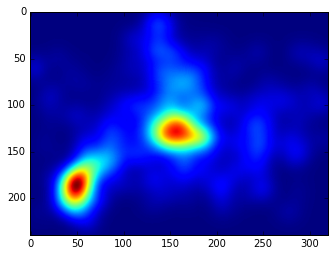

In [7]:
plt.imshow(Y_val[3,0,:,:])
np.amax(Y_val[3])

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
conv4
conv5
conv6
conv7
conv8
conv9
upsampling2d_1
deconv
activation_1


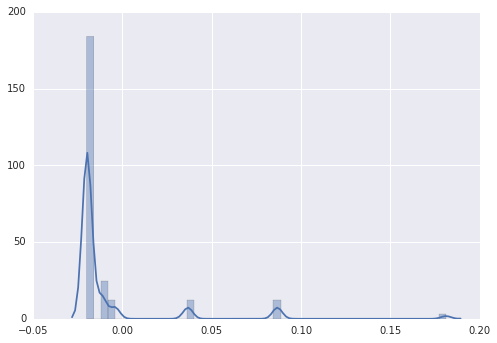

In [30]:
for layer in model.layers:
    #pass
    print layer.name

w = model.get_layer('deconv').get_weights()[0]
w.shape
#plt.imshow(w[0,0,:,:])
sns.distplot(w[0].flatten())

In [82]:
new_model = Model(input=model.input, output=model.get_layer('conv5').output)
activ = new_model.predict(X_train[:10])

(10, 512, 60, 80)


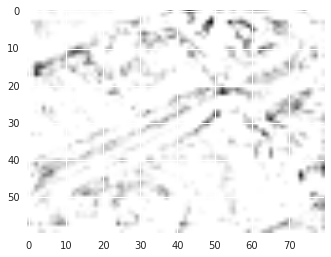

In [84]:
print activ.shape
plt.imshow(activ[0,0,:,:])
#sns.distplot(activ.flatten())